# Importing and Exploring Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os
from scipy.optimize import curve_fit
from scipy import stats

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Looking at Data Types and Looking at Null Values

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#a little more clean up. Removing null values from basement column
errors = []
for idx in df.index:
    val = df.sqft_basement[idx]
    try:
        float(val)
    except: 
        errors.append(idx)
df.iloc[errors]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [9]:
df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')
df.sqft_basement.dropna(inplace=True)

In [10]:
df.head(8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711


In [11]:
df.yr_renovated.isna().sum()
df.yr_renovated.dropna(inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Find Correlations with Target Variable; Target Variable = Price

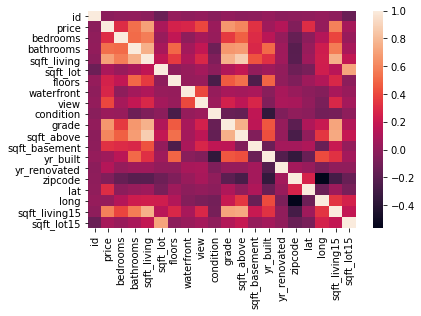

In [12]:
corr = df.corr()
sns.heatmap(corr);

In [13]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
sqft_basement    0.325008
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

### Comparisons with the target variable: Month, Bathrooms, Grade, and Sqft_Living

# Starting Data Analysis

In [14]:
#Question 1: What is the best month to buy a house? 
#Seperating Date to Month
df['date'] = pd.to_datetime(df['date'].str.strip())
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [15]:
#isolating Month and Price
df_mp = df[['Month', 'price']]
df_mp

,Month,price
0,10,221900.0
1,12,538000.0
2,2,180000.0
3,12,604000.0
4,2,510000.0
...,...,...
21592,5,360000.0
21593,2,400000.0
21594,6,402101.0
21595,1,400000.0


In [16]:
#Bootstrapping to find the range of house prices in certain months.
def bootstrap_categories(df, category, target, sample_count=200):
    unique=df[category].unique()
    
    for val in unique:
        samples=[]
        for i in range(sample_count):
            frame=df[df[category]==val]
            sample=np.random.choice(frame[target],size=frame.shape[0],replace=True)
            samples.append(sample.mean())
        plt.hist(samples, label=val,alpha=.7)
    plt.legend()

In [17]:
#Looking for duplicates that might interfere with data
df_mp = df_mp.drop_duplicates()
df_mp

,Month,price
0,10,221900.0
1,12,538000.0
2,2,180000.0
3,12,604000.0
4,2,510000.0
...,...,...
21582,10,541800.0
21584,10,1540000.0
21587,8,507250.0
21589,10,610685.0


In [18]:
#Look for difference in types to make sure it doesn't interfere with visualization.
df_mp.info()
df_mp['price'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10134 entries, 0 to 21594
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   10134 non-null  int64  
 1   price   10134 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 237.5 KB


0         221900
1         538000
2         180000
3         604000
4         510000
          ...   
21582     541800
21584    1540000
21587     507250
21589     610685
21594     402101
Name: price, Length: 10134, dtype: int64

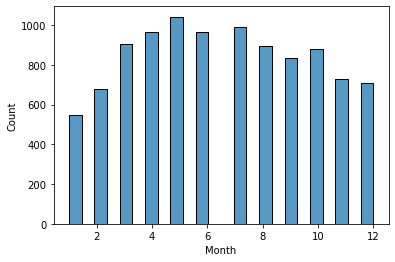

In [19]:
#Using histogram, we can find out when the most houses are sold.
sns.histplot(data=df_mp, x="Month");

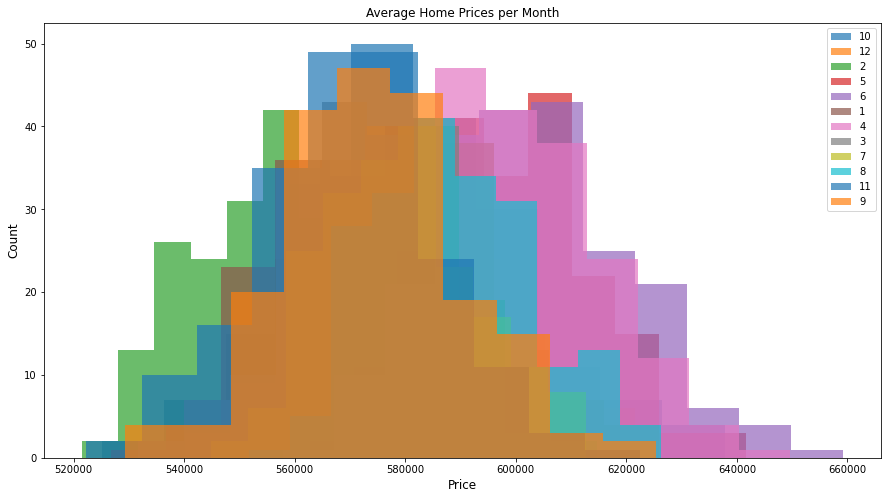

In [84]:
plt.figure(figsize=(15,8))
bootstrap_categories(df_mp, 'Month', 'price')
plt.ylabel('Count', size=12)
plt.xlabel('Price', size=12)
plt.title('Average Home Prices per Month', size=12);

C:\Users\letru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 2160x1080 with 0 Axes>

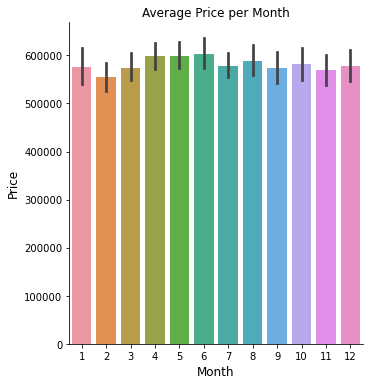

In [80]:
plt.figure(figsize=(30,15))
sns.catplot('Month', 'price', data=df_mp, kind='bar')
plt.title('Average Price per Month', size=12)
plt.ylabel('Price', size=12)
plt.xlabel('Month', size=12);

Text(0.5, 1.0, 'Price, Age of Home, and Location')

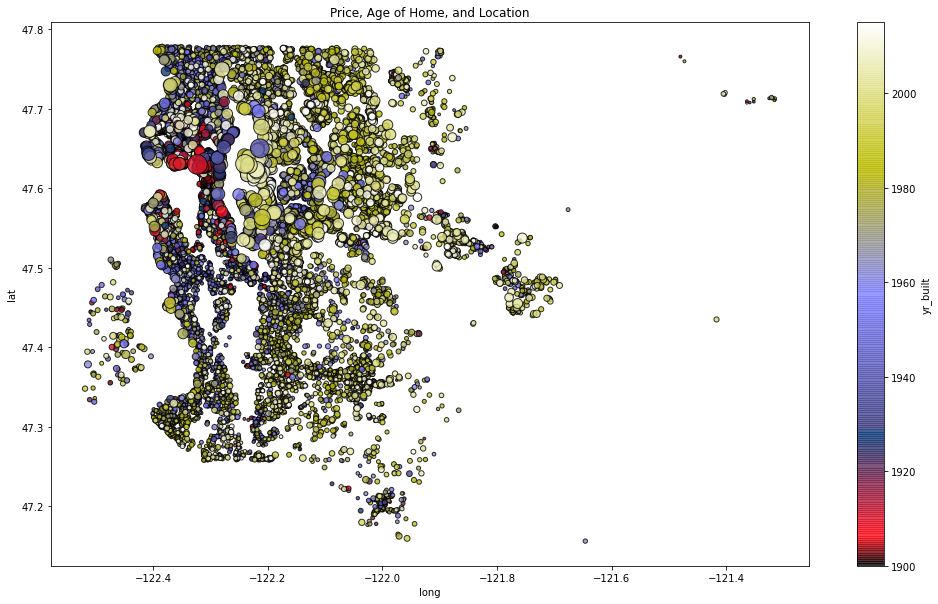

In [22]:
fig, ax = plt.subplots(figsize=(17,10))
sorted_df = df.sort_values(['price', 'yr_built'])
sorted_df.plot(kind="scatter", x="long", y="lat", edgecolor='black',alpha=0.8,
c="yr_built", s=sorted_df.price/20000, ax=ax,cmap=plt.get_cmap("gist_stern"), colorbar=True);
plt.title('Price, Age of Home, and Location')

Larger bubbles mean larger sales prices, colors = years. 
Super expensive, older houses in North West. Super expensive and newer in North East. 

In [23]:
#Finding average cost of houses based on the month. 
df_mp1 = df_mp.groupby('Month')['price'].mean()
df_mp1

Month
1     576665.591985
2     554967.214180
3     574399.066372
4     599240.896480
5     599022.686180
6     602711.514523
7     578677.720202
8     588485.286830
9     574327.256903
10    581666.594318
11    568592.302613
12    578912.331445
Name: price, dtype: float64

### Observations:
- February shows the cheapest prices 
    - Post holidays, marketers and real estate agents want to start their year off strong.
- June shows the most expensive prices on average.
- However, based on the data shown above... on average, more houses are sold in April and May
    - Spring time means more showings, more showings means more home purchases
    - Mean price in June = 602k, where as mean in February is 554k. 10% premium.
        - Average house price in April and May are about 599k. Statistically not significant buying anywhere between April and June.
- Area is also important. Long/Latitude map shows prices in the north were more expensive than those sold in the south.

# Price, Bathrooms, Grade, and Sqft_Living

In [24]:
price = df[['price','bathrooms', 'grade', 'sqft_living']]
price = price.set_index('price').reset_index()
price

,price,bathrooms,grade,sqft_living
0,221900.0,1.00,7,1180
1,538000.0,2.25,7,2570
2,180000.0,1.00,6,770
3,604000.0,3.00,7,1960
4,510000.0,2.00,8,1680
...,...,...,...,...
21592,360000.0,2.50,8,1530
21593,400000.0,2.50,8,2310
21594,402101.0,0.75,7,1020
21595,400000.0,2.50,8,1600


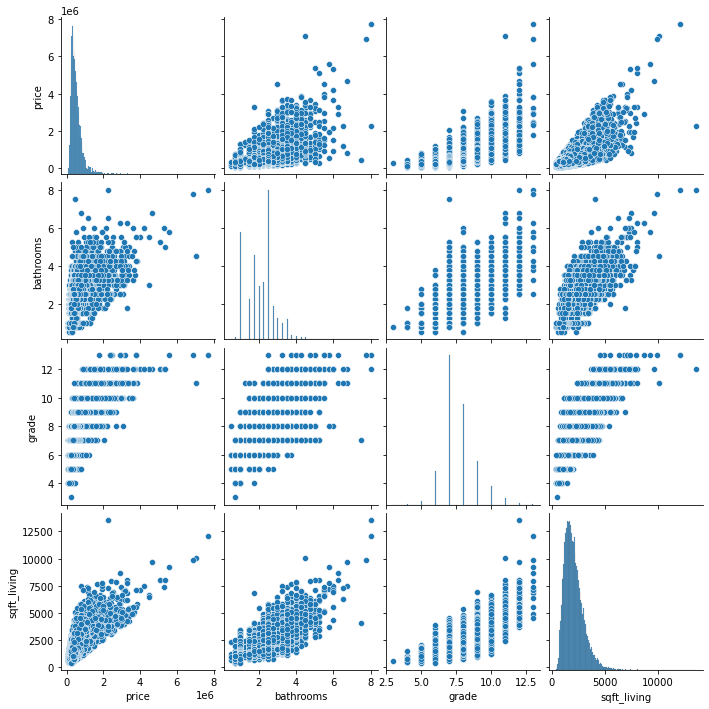

In [25]:
sns.pairplot(price)

**Looking at bathrooms**

In [28]:
model_1 = df[['bathrooms', 'price']]
model_1 = model_1.set_index('price').reset_index()
model_1

,price,bathrooms
0,221900.0,1.00
1,538000.0,2.25
2,180000.0,1.00
3,604000.0,3.00
4,510000.0,2.00
...,...,...
21592,360000.0,2.50
21593,400000.0,2.50
21594,402101.0,0.75
21595,400000.0,2.50


In [29]:
model_1 = model_1[(np.abs(stats.zscore(model_1)) < 2).all(axis=1)]
model_1

,price,bathrooms
0,221900.0,1.00
1,538000.0,2.25
2,180000.0,1.00
3,604000.0,3.00
4,510000.0,2.00
...,...,...
21592,360000.0,2.50
21593,400000.0,2.50
21594,402101.0,0.75
21595,400000.0,2.50


In [30]:
model_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20449 entries, 0 to 21596
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      20449 non-null  float64
 1   bathrooms  20449 non-null  float64
dtypes: float64(2)
memory usage: 479.3 KB


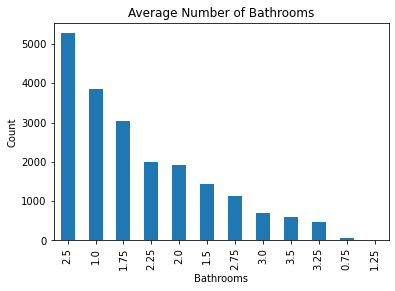

In [31]:
model_1['bathrooms'].value_counts().plot(kind='bar')
plt.title('Average Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
sns.despine;

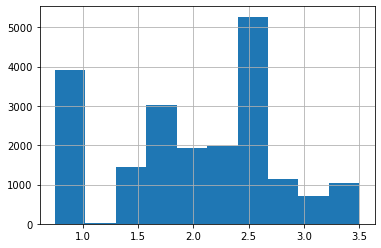

In [32]:
model_1['bathrooms'].hist();

- Most houses sold have 1 and 2.5 bathrooms. 
- Kind of a normal distribution; mean is 2.11 bathrooms; outliers after 4.

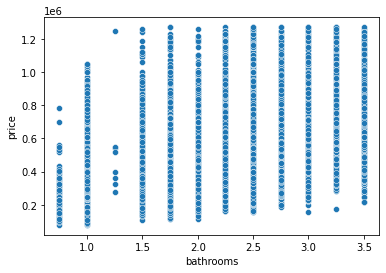

In [33]:
sns.scatterplot(data=model_1, x="bathrooms", y="price");

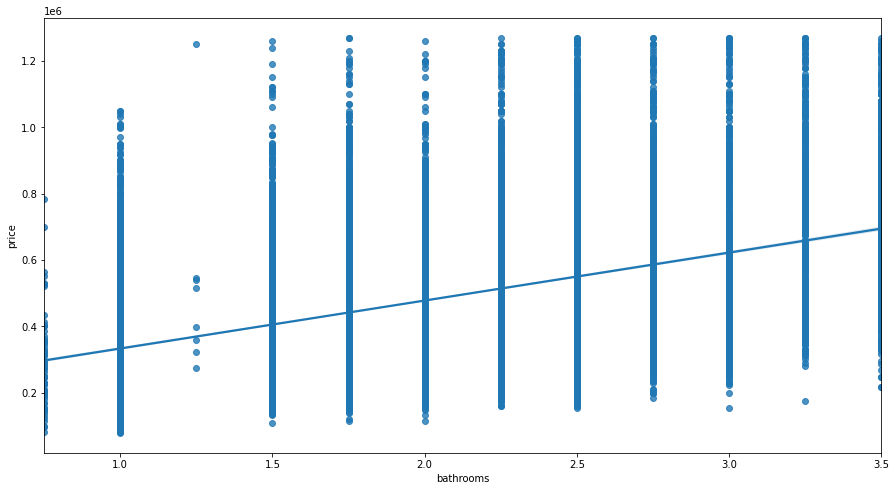

In [120]:
plt.figure(figsize=(15,8))
sns.regplot(x="bathrooms", y="price", data=model_1);

<Figure size 1080x576 with 0 Axes>

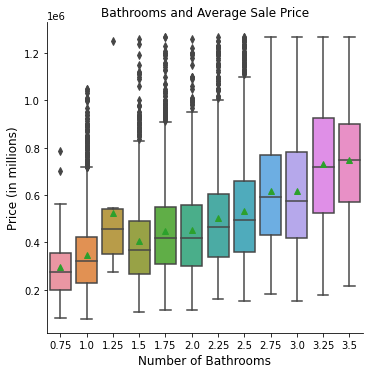

In [117]:
plt.figure(figsize=(15,8))
sns.catplot(x='bathrooms', y='price', data=model_1, kind='box', showmeans=True)
plt.ylabel('Price (in millions)', size=12)
plt.xlabel('Number of Bathrooms', size=12)
plt.title('Bathrooms and Average Sale Price', size=12);

In [36]:
fsm_bathroom = model_1[['price', 'bathrooms']].copy()
fsm_bathroom.dropna(inplace=True)

In [37]:
fsm = ols(formula='price~bathrooms', data=fsm_bathroom)
fsm_results = fsm.fit()
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     5012.
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:07:42   Log-Likelihood:            -2.7831e+05
No. Observations:               20449   AIC:                         5.566e+05
Df Residuals:                   20447   BIC:                         5.566e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.883e+05   4377.971     43.010      0.000     1.8e+05    1.97e+05
bathrooms   1.446e+05   2042.211     70.797      0.000    1.41e+05    1.49e+05
==============================================================================
Omnibus:                     2145.974   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2927.948
Skew:                           0.856   Prob(JB):                         0.00
Kurtosis:                       3.713   Cond. No.                         8.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 20% chance of variance in our model. This makes sense as most houses don't have varying amounts of bathrooms in them.
    * for every "house" without bathroom that has bathroom set to 0, cost on average ~188k. With increase of 1 bathroom, on average, we would increase the sales price by the same value.
- This model finds intercept to be statistically non-significant.


In [118]:
 1.446e+05

144600.0

### Bathroom Model Evaluation

In [38]:
#linearity
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print('Rainbow_statistic: ', rainbow_statistic)
print('Rainbow p_value: ', rainbow_p_value)

Rainbow_statistic:  0.9971495213633422
Rainbow p_value:  0.557372568531262


P_value is 0.56 which is greater than our alpha of .5. We fail to reject null hypothesis!

Based on the JB probability of 0.0 < .5, we reject the null hypothesis of this being normally distributed. JB value is large.


In [39]:
#homoscedascity 
y = fsm_bathroom['price']
y_hat_br = fsm_results.predict()

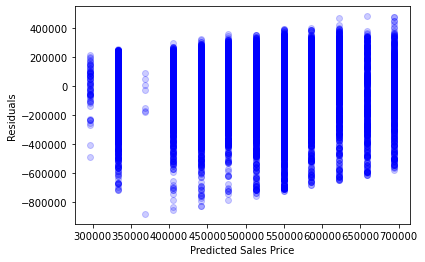

In [40]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Sales Price",
        ylabel="Residuals")
ax2.scatter(x=y_hat_br, y=y_hat_br-y, color="blue", alpha=0.2);

Model has a weird cone shape; expecting most homes, on average, one bathroom. To double check work, we will test with the BP Test. 
Model not performing consistantly across model. As price increases, model starts underpredicting. 
Wider the blue bars, more error we're expericing. 

In [41]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat_br, fsm_bathroom[["bathrooms"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


Low P_Value means we reject the null hypothesis because this model violates the homoscedasticity assumption.

## Adding on another feature.
**Looking at grade of houses**

In [42]:
model_2 = df[['bathrooms', 'price', 'grade']]
model_2 = model_2.set_index('price').reset_index()
model_2

,price,bathrooms,grade
0,221900.0,1.00,7
1,538000.0,2.25,7
2,180000.0,1.00,6
3,604000.0,3.00,7
4,510000.0,2.00,8
...,...,...,...
21592,360000.0,2.50,8
21593,400000.0,2.50,8
21594,402101.0,0.75,7
21595,400000.0,2.50,8


In [43]:
model_2 = model_2[(np.abs(stats.zscore(model_2)) < 3).all(axis=1)]
model_2

,price,bathrooms,grade
0,221900.0,1.00,7
1,538000.0,2.25,7
2,180000.0,1.00,6
3,604000.0,3.00,7
4,510000.0,2.00,8
...,...,...,...
21592,360000.0,2.50,8
21593,400000.0,2.50,8
21594,402101.0,0.75,7
21595,400000.0,2.50,8


In [44]:
model_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21024 entries, 0 to 21596
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21024 non-null  float64
 1   bathrooms  21024 non-null  float64
 2   grade      21024 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 657.0 KB


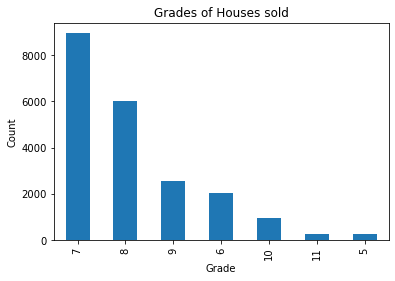

In [45]:
model_2['grade'].value_counts().plot(kind='bar')
plt.title('Grades of Houses sold')
plt.xlabel('Grade')
plt.ylabel('Count')
sns.despine;

<AxesSubplot:>

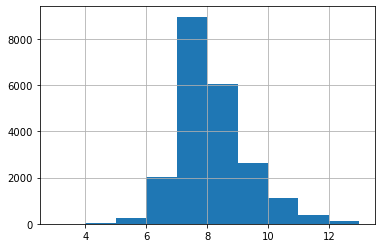

In [46]:
df['grade'].hist()

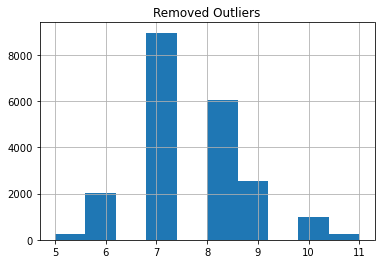

In [47]:
model_2['grade'].hist()
plt.title('Removed Outliers');

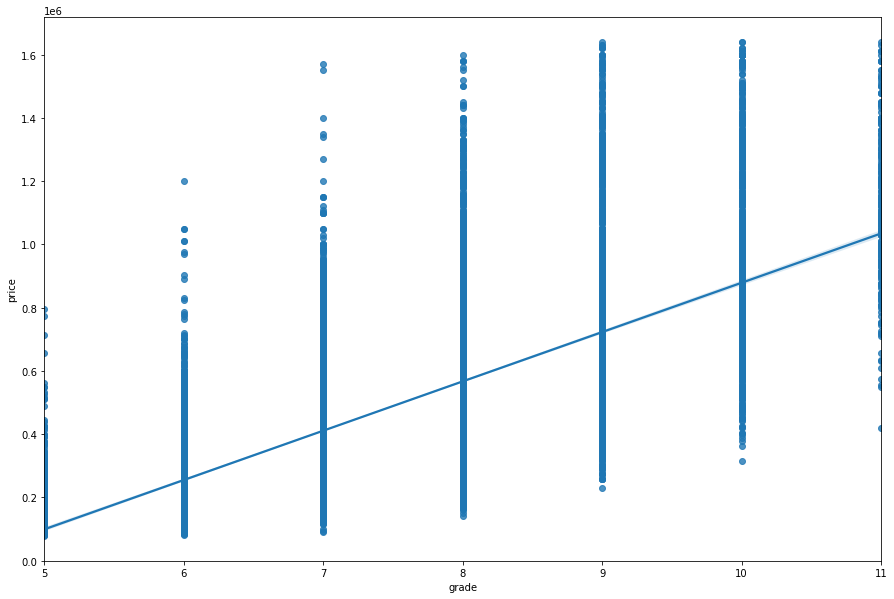

In [48]:
plt.figure(figsize=(15,10))
sns.regplot(x="grade", y="price", data=model_2);

<Figure size 1080x576 with 0 Axes>

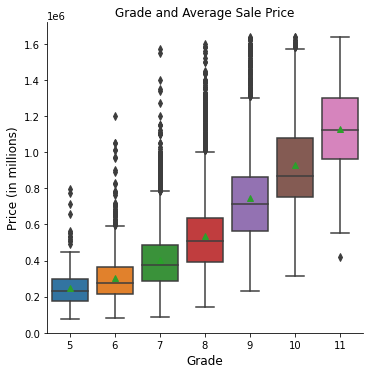

In [108]:
plt.figure(figsize=(15, 8))
sns.catplot(x='grade',
            y='price',
            data=model_2,
            kind='box',
            showmeans=True)
plt.ylabel("Price (in millions)", size=12)
plt.xlabel("Grade", size=12)
plt.title("Grade and Average Sale Price");

In [109]:
np.corrcoef(model_2.grade, model_2.price)[0][1]

0.6614779156933082

In [50]:
model_2.groupby('grade')['price'].mean().astype('int64')

grade
5      248523
6      301916
7      402064
8      538137
9      743428
10     928863
11    1126302
Name: price, dtype: int64

In [51]:
fsm_grade = price[['price', 'grade', 'bathrooms']].copy()

In [52]:
fsm2 = ols(formula='price~bathrooms + grade', data=fsm_grade)
fsm2_results = fsm2.fit()
fsm2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     9123.
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:08:17   Log-Likelihood:            -3.0078e+05
No. Observations:               21597   AIC:                         6.016e+05
Df Residuals:                   21594   BIC:                         6.016e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -9.76e+05   1.28e+04    -76.401      0.000      -1e+06   -9.51e+05
bathrooms   6.965e+04   3207.937     21.712      0.000    6.34e+04    7.59e+04
grade       1.788e+05   2102.671     85.016      0.000    1.75e+05    1.83e+05
==============================================================================
Omnibus:                    19382.913   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1800084.117
Skew:                           3.944   Prob(JB):                         0.00
Kurtosis:                      47.024   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
-9.76e+05

-976000.0

In [123]:
 1.788e+05*5

894000.0

### Observations:

- Most houses sold are between grades 6 and 10, on a sale of 1 - 13.
- Price increases as grade increases.
    * For some reason, houses grades 4 and 5 are cheaper than grades 3. 
- Distrubtion is almost normally distributed. 
- Based on linear regression visualization, slight positive correlation. 
    * Because grades are "subjective", it is difficult to establish a linear relationship. This might be an ordinal relationship.

### Grade Model Evaluation

In [53]:
#linearity
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm2_results)
print('Rainbow_statistic: ', rainbow_statistic)
print('Rainbow p_value: ', rainbow_p_value)

Rainbow_statistic:  1.085392645804298
Rainbow p_value:  1.0381491545645163e-05


JB value has gotten worse. The Prob(JB) value of 0.0 shows that we see the data is normally distributed as shown in the histogram shown above.

In [54]:
#homo
y2 = fsm_grade["price"]
y_hat_2 = fsm2_results.predict()

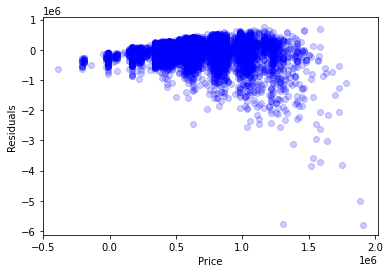

In [55]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Price",
        ylabel="Residuals")
ax2.scatter(x=y_hat_2, y=y_hat_2-y2, color="blue", alpha=0.2);

As the sales price gets beyond 1e6, the degree is to what we are underpredicting is large.

In [56]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y2-y_hat_2, fsm_grade[["grade", "bathrooms"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 1.025563607167047e-229
F-statistic p-value: 8.787293930312007e-234


The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity. Thus returning a low p-value means that the current model violates the homoscedasticity assumption

In [57]:
#independence
rows = fsm_grade[["grade", "bathrooms"]].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(2)]
vif_df["feature"] = ["grade", "bathrooms"]

vif_df

,VIF,feature
0,13.936816,grade
1,13.936816,bathrooms


Anything above 5 violates the independence assumption.

### Sqft of Living Space

In [58]:
model_3 = df[['price', 'sqft_living', 'bathrooms', 'grade']]
model_3 = model_3.set_index('price').reset_index()
model_3

,price,sqft_living,bathrooms,grade
0,221900.0,1180,1.00,7
1,538000.0,2570,2.25,7
2,180000.0,770,1.00,6
3,604000.0,1960,3.00,7
4,510000.0,1680,2.00,8
...,...,...,...,...
21592,360000.0,1530,2.50,8
21593,400000.0,2310,2.50,8
21594,402101.0,1020,0.75,7
21595,400000.0,1600,2.50,8


In [59]:
model_3 = model_3[(np.abs(stats.zscore(model_3)) < 3).all(axis=1)]
model_3

,price,sqft_living,bathrooms,grade
0,221900.0,1180,1.00,7
1,538000.0,2570,2.25,7
2,180000.0,770,1.00,6
3,604000.0,1960,3.00,7
4,510000.0,1680,2.00,8
...,...,...,...,...
21592,360000.0,1530,2.50,8
21593,400000.0,2310,2.50,8
21594,402101.0,1020,0.75,7
21595,400000.0,1600,2.50,8


In [60]:
model_3.duplicated().sum()

342

In [61]:
model_3 = model_3.drop_duplicates()
model_3

,price,sqft_living,bathrooms,grade
0,221900.0,1180,1.00,7
1,538000.0,2570,2.25,7
2,180000.0,770,1.00,6
3,604000.0,1960,3.00,7
4,510000.0,1680,2.00,8
...,...,...,...,...
21592,360000.0,1530,2.50,8
21593,400000.0,2310,2.50,8
21594,402101.0,1020,0.75,7
21595,400000.0,1600,2.50,8


In [62]:
model_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20602 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        20602 non-null  float64
 1   sqft_living  20602 non-null  int64  
 2   bathrooms    20602 non-null  float64
 3   grade        20602 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 804.8 KB


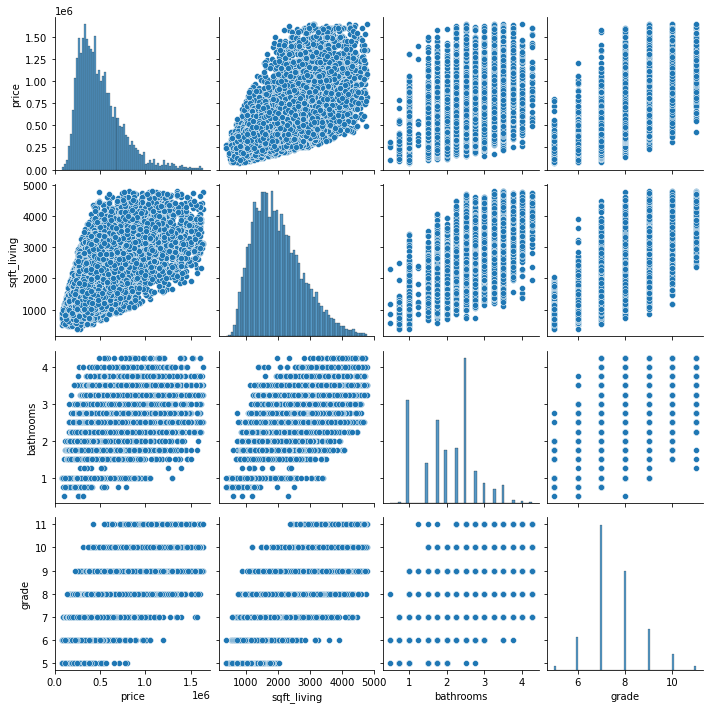

In [63]:
#checking on linear relationships after removing outliers.
sns.pairplot(model_3)

<AxesSubplot:>

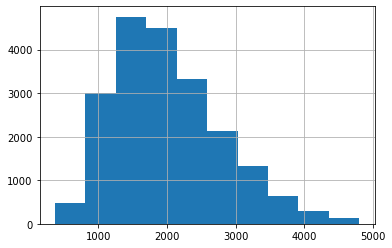

In [64]:
model_3['sqft_living'].hist()

Text(0.5, 1.0, 'Price vs Sqft')

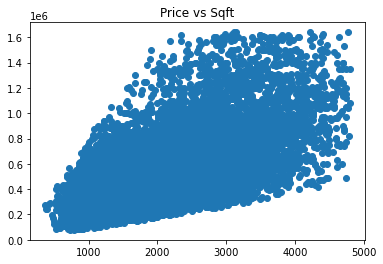

In [65]:
plt.scatter(model_3.sqft_living, model_3.price)
plt.title('Price vs Sqft')

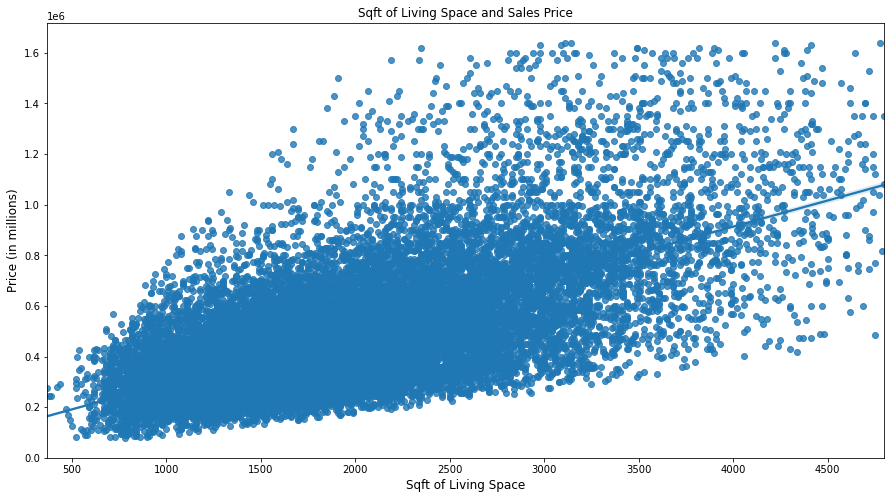

In [116]:
plt.figure(figsize=(15,8))
sns.regplot(x="sqft_living", y="price", data=model_3)
plt.ylabel('Price (in millions)', size=12)
plt.xlabel('Sqft of Living Space', size=12)
plt.title('Sqft of Living Space and Sales Price', size=12);

In [67]:
fsm_living = model_3[['price', 'sqft_living', 'bathrooms', 'grade']].copy()
fsm_live = ols(formula='price~sqft_living + bathrooms + grade', data=model_3)
fsm_live_results = fsm_live.fit()
fsm_live_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     6599.
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:08:47   Log-Likelihood:            -2.7853e+05
No. Observations:               20602   AIC:                         5.571e+05
Df Residuals:                   20598   BIC:                         5.571e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.337e+05   1.01e+04    -42.848      0.000   -4.54e+05   -4.14e+05
sqft_living   127.8950      2.658     48.121      0.000     122.686     133.104
bathrooms    -2.65e+04   2633.082    -10.066      0.000   -3.17e+04   -2.13e+04
grade        9.676e+04   1742.313     55.535      0.000    9.33e+04       1e+05
==============================================================================
Omnibus:                     3804.380   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8850.943
Skew:                           1.051   Prob(JB):                         0.00
Kurtosis:                       5.427   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
-4.337e5

-433700.0

In [69]:
#linerar
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_live_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.9929386312020961
Rainbow p-value: 0.6404161038827159


JB values have gotten so, so much worse... we can infer the normality assumption has been violated.

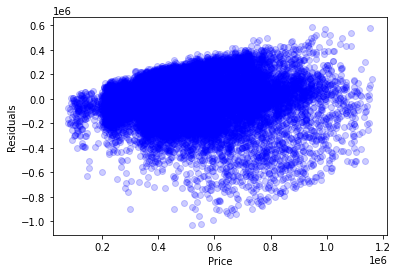

In [70]:
#homo
y3 = fsm_living["price"]
y_hat_3 = fsm_live_results.predict()
fig4, ax4 = plt.subplots()
ax4.set(xlabel="Price",
        ylabel="Residuals")
ax4.scatter(x=y_hat_3, y=y_hat_3-y3, color="blue", alpha=0.2);

In [71]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y3-y_hat_3, fsm_living[["grade", "bathrooms", 'sqft_living']])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


In [72]:
#independence
rows = fsm_living[["grade", "bathrooms", "sqft_living"]].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(3)]
vif_df["feature"] = ["grade", "bathrooms", "sqft_living"]

vif_df

,VIF,feature
0,17.563883,grade
1,21.108289,bathrooms
2,17.676234,sqft_living


## Removing Dummies 

In [86]:
pd.get_dummies(df, columns=['grade', 'bathrooms'], drop_first=True).columns

Index(['id', 'date', 'price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'Month', 'Day', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'bathrooms_0.75', 'bathrooms_1.0', 'bathrooms_1.25',
       'bathrooms_1.5', 'bathrooms_1.75', 'bathrooms_2.0', 'bathrooms_2.25',
       'bathrooms_2.5', 'bathrooms_2.75', 'bathrooms_3.0', 'bathrooms_3.25',
       'bathrooms_3.5', 'bathrooms_3.75', 'bathrooms_4.0', 'bathrooms_4.25',
       'bathrooms_4.5', 'bathrooms_4.75', 'bathrooms_5.0', 'bathrooms_5.25',
       'bathrooms_5.5', 'bathrooms_5.75', 'bathrooms_6.0', 'bathrooms_6.25',
       'bathrooms_6.5', 'bathrooms_6.75', 'bathrooms_7.5', 'bathrooms_7.75',
       'bathrooms_8.0'],
      dtype='object')

In [87]:
def create_formula(df, target='price'):
    columns = df.columns.to_list()
    columns.remove(target)
    formula = target+"~"+"+".join(columns)
    return formula

In [88]:
create_formula(df, 'price')

'price~id+date+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+Month+Day'

**Creating Model DF**

In [89]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Month', 'Day'],
      dtype='object')

In [101]:
model_df = df[['bathrooms', 'sqft_living','grade', 'price']]
model_df = model_3[(np.abs(stats.zscore(model_3)) < 3).all(axis=1)]
model_df

,price,sqft_living,bathrooms,grade
0,221900.0,1180,1.00,7
1,538000.0,2570,2.25,7
2,180000.0,770,1.00,6
3,604000.0,1960,3.00,7
4,510000.0,1680,2.00,8
...,...,...,...,...
21592,360000.0,1530,2.50,8
21593,400000.0,2310,2.50,8
21594,402101.0,1020,0.75,7
21595,400000.0,1600,2.50,8


In [91]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19968 non-null  float64
 1   sqft_living  19968 non-null  int64  
 2   bathrooms    19968 non-null  float64
 3   grade        19968 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 780.0 KB


**Creating Formulua**

In [92]:
formula = create_formula(model_df)

**Run Model**

In [93]:
model = ols(formula, model_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     5330.
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:37:58   Log-Likelihood:            -2.6762e+05
No. Observations:               19968   AIC:                         5.352e+05
Df Residuals:                   19964   BIC:                         5.353e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.339e+05   9554.624    -34.948      0.000   -3.53e+05   -3.15e+05
sqft_living   114.1956      2.455     46.508      0.000     109.383     119.008
bathrooms   -2.437e+04   2401.398    -10.150      0.000   -2.91e+04   -1.97e+04
grade        8.509e+04   1627.488     52.285      0.000    8.19e+04    8.83e+04
==============================================================================
Omnibus:                     1813.301   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2560.327
Skew:                           0.732   Prob(JB):                         0.00
Kurtosis:                       3.966   Cond. No.                     1.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model DF Testing**

In [94]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print('Rainbow_statistic: ', rainbow_statistic)
print('Rainbow p_value: ', rainbow_p_value)

Rainbow_statistic:  0.9908132760564389
Rainbow p_value:  0.6776124316340504


JB value is still very high, violating normality assumption

In [95]:
y_model = model_df["price"]
y_hat_model = model.predict()

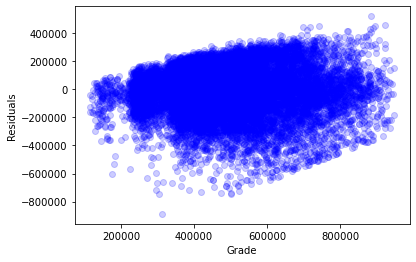

In [96]:
fig5, ax5 = plt.subplots()
ax5.set(xlabel="Grade",
        ylabel="Residuals")
ax5.scatter(x=y_hat_model, y=y_hat_model-y_model, color="blue", alpha=0.2);

In [97]:
#independence
rows = model_df[["grade", "bathrooms", "sqft_living"]].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(3)]
vif_df["feature"] = ["grade", "bathrooms", "sqft_living"]

vif_df

,VIF,feature
0,17.717120,grade
1,20.773426,bathrooms
2,18.095202,sqft_living


In [98]:
model_df

,price,sqft_living,bathrooms,grade
0,221900.0,1180,1.00,7
1,538000.0,2570,2.25,7
2,180000.0,770,1.00,6
3,604000.0,1960,3.00,7
4,510000.0,1680,2.00,8
...,...,...,...,...
21592,360000.0,1530,2.50,8
21593,400000.0,2310,2.50,8
21594,402101.0,1020,0.75,7
21595,400000.0,1600,2.50,8


In [103]:
model_df['per_sq'] = model_df['price']/model_df['sqft_living']

<ipython-input-103-db3f1fb5ebee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['per_sq'] = model_df['price']/model_df['sqft_living']


In [104]:
model_df

,price,sqft_living,bathrooms,grade,per_sq
0,221900.0,1180,1.00,7,188.050847
1,538000.0,2570,2.25,7,209.338521
2,180000.0,770,1.00,6,233.766234
3,604000.0,1960,3.00,7,308.163265
4,510000.0,1680,2.00,8,303.571429
...,...,...,...,...,...
21592,360000.0,1530,2.50,8,235.294118
21593,400000.0,2310,2.50,8,173.160173
21594,402101.0,1020,0.75,7,394.216667
21595,400000.0,1600,2.50,8,250.000000


## Bootstrapping categoricals

Boot strapping is sampling technique

**How it works**
1. Loop over a set number
2. Randomly sample from data with replacement. The sample size is equal to the size of the data we are sampling from.
3. Append the mean of the sample from step two to a list.